**Movies Review Classification NLP**


Import required libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import nltk
import re # for regex
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
df= pd.read_csv('https://thecleverprogrammer.com/wp-content/uploads/2020/05/IMDB-Dataset.csv')


Performing EDA

In [4]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [ ]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [ ]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
df['sentiment'].unique()

array(['positive', 'negative'], dtype=object)

In [ ]:
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

<Axes: xlabel='sentiment', ylabel='count'>

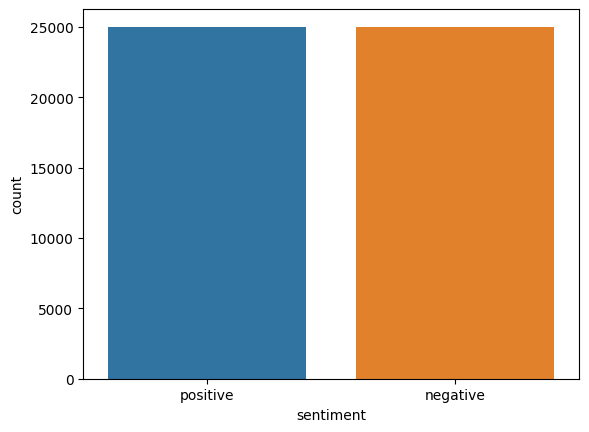

In [ ]:
sns.countplot(x ='sentiment', data = df)

Apply LabelEncoding to make target feature into numerical

In [ ]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['sentiment'] = label.fit_transform(df['sentiment'])

In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


Divide data into independent and dependent

In [ ]:
x = df['review']
y = df['sentiment']

Remove all special and numeric character from data and also remove stopwords and apply stemming

In [ ]:
import nltk
nltk.download('stopwords')

ps  = PorterStemmer()
corpus = []

for i in range(len(x)):
  print(i)
  review = re.sub("[^a-zA-Z]"," ",x[i])
  review = review.lower()
  review = review.split()
  review = [ps.stem(word)for word in review if word not in set(stopwords.words("english"))]
  review = " ".join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Streaming output truncated to the last 5000 lines.
45000
45001
45002
45003
45004
45005
45006
45007
45008
45009
45010
45011
45012
45013
45014
45015
45016
45017
45018
45019
45020
45021
45022
45023
45024
45025
45026
45027
45028
45029
45030
45031
45032
45033
45034
45035
45036
45037
45038
45039
45040
45041
45042
45043
45044
45045
45046
45047
45048
45049
45050
45051
45052
45053
45054
45055
45056
45057
45058
45059
45060
45061
45062
45063
45064
45065
45066
45067
45068
45069
45070
45071
45072
45073
45074
45075
45076
45077
45078
45079
45080
45081
45082
45083
45084
45085
45086
45087
45088
45089
45090
45091
45092
45093
45094
45095
45096
45097
45098
45099
45100
45101
45102
45103
45104
45105
45106
45107
45108
45109
45110
45111
45112
45113
45114
45115
45116
45117
45118
45119
45120
45121
45122
45123
45124
45125
45126
45127
45128
45129
45130
45131
45132
45133
45134
45135
45136
45137
45138
45139
45140
45141
45142
45143
45144
45145
45146
45147
45148
45149
45150
45151
45152
45153
45154
45155
45156
45157
4

In [ ]:
corpus

NameError: ignored

Apply TfidVectorizer to make text data into vectors

In [ ]:
# TF-IDF vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=5000)
X = cv.fit_transform(corpus).toarray()
Y = cv.fit_transform(corpus).toarray()

In [ ]:
X.shape
Y.shape

(50000, 5000)

Split data into train and test

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [ ]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((35000, 5000), (15000, 5000), (35000,), (15000,))

In [ ]:
mnb = MultinomialNB()  # Initialize a Multinomial Naive Bayes classifier
mnb.fit(X_train, Y_train)

MultinomialNB()

In [ ]:
pred = mnb.predict(X_test)

In [ ]:
print(accuracy_score(Y_test , pred))
print(classification_report(Y_test,pred))

0.8500666666666666
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      7474
           1       0.85      0.85      0.85      7526

    accuracy                           0.85     15000
   macro avg       0.85      0.85      0.85     15000
weighted avg       0.85      0.85      0.85     15000



In [ ]:
pd.DataFrame(np.c_[Y_test, pred], columns=["Actual","predicted"] )

,Actual,predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
14995,1,1
14996,0,0
14997,1,1
14998,1,1


In [ ]:
pickle.dump(cv, open("TfidfVectorizer.pkl","wb"))
pickle.dump(mnb, open("Movies_review_classifcation.pkl",'wb'))

In [ ]:
save_cv = pickle.load(open("TfidfVectorizer.pkl",'rb'))
model =pickle.load(open("Movies_review_classifcation.pkl",'rb'))

In [ ]:
def test_model(sentence):
  sen = save_cv.transform([sentence]).toarray()
  res = model.predict(sen)[0]
  if res == 1:
    return 'positive review'
  else:
      return 'negative review'

In [ ]:
sen = "this is wonderful movie of my life"
res = test_model(sen)
print(res)

positive review


In [ ]:
sen = "this is worst movie of my life"
res = test_model(sen)
print(res)

negative review
